In [358]:
import cv2
import glob
import numpy as np
from torch.autograd import Variable
import torch.nn as nn

In [359]:
imgs_names = []
target_names = []

In [361]:
# for filename in glob.glob('../Research/Shadow/ISTD_Dataset/train/train_A/*.png'):
#     imgs_names.append(filename)
#     s = ""
#     s += filename[0:38] + "train_C" + filename[45:len(filename)] # 38:45 exclude this to add the new train_C
# #     print(s, filename)
#     target_names.append(s)
    
for filename in glob.glob('../Research/Shadow/card/train/*.png'):
    imgs_names.append(filename)
    s = ""
    s += filename[0:24] + "gt/" + filename[31:len(filename)]
    print(s, filename)
    target_names.append(s)

../Research/Shadow/card/gt/19.png ../Research/Shadow/card/train/a19.png
../Research/Shadow/card/gt/18.png ../Research/Shadow/card/train/a18.png
../Research/Shadow/card/gt/1.png ../Research/Shadow/card/train/a1.png
../Research/Shadow/card/gt/24.png ../Research/Shadow/card/train/a24.png
../Research/Shadow/card/gt/3.png ../Research/Shadow/card/train/a3.png
../Research/Shadow/card/gt/2.png ../Research/Shadow/card/train/a2.png
../Research/Shadow/card/gt/6.png ../Research/Shadow/card/train/a6.png
../Research/Shadow/card/gt/23.png ../Research/Shadow/card/train/a23.png
../Research/Shadow/card/gt/22.png ../Research/Shadow/card/train/a22.png
../Research/Shadow/card/gt/7.png ../Research/Shadow/card/train/a7.png
../Research/Shadow/card/gt/5.png ../Research/Shadow/card/train/a5.png
../Research/Shadow/card/gt/9.png ../Research/Shadow/card/train/b9.png
../Research/Shadow/card/gt/20.png ../Research/Shadow/card/train/a20.png
../Research/Shadow/card/gt/21.png ../Research/Shadow/card/train/a21.png
../Res

In [362]:
for i in range(0, 10):
    print(imgs_names[i], target_names[i])

../Research/Shadow/card/train/a19.png ../Research/Shadow/card/gt/19.png
../Research/Shadow/card/train/a18.png ../Research/Shadow/card/gt/18.png
../Research/Shadow/card/train/a1.png ../Research/Shadow/card/gt/1.png
../Research/Shadow/card/train/a24.png ../Research/Shadow/card/gt/24.png
../Research/Shadow/card/train/a3.png ../Research/Shadow/card/gt/3.png
../Research/Shadow/card/train/a2.png ../Research/Shadow/card/gt/2.png
../Research/Shadow/card/train/a6.png ../Research/Shadow/card/gt/6.png
../Research/Shadow/card/train/a23.png ../Research/Shadow/card/gt/23.png
../Research/Shadow/card/train/a22.png ../Research/Shadow/card/gt/22.png
../Research/Shadow/card/train/a7.png ../Research/Shadow/card/gt/7.png


In [377]:
imgs = []
target = []
for i in range(0, len(imgs_names)):
# for i in range(0, 10):
    print(imgs_names[i], target_names[i])
    imgs.append(cv2.imread(imgs_names[i]))
    target.append(cv2.imread(target_names[i]))

../Research/Shadow/card/train/a19.png ../Research/Shadow/card/gt/19.png
../Research/Shadow/card/train/a18.png ../Research/Shadow/card/gt/18.png
../Research/Shadow/card/train/a1.png ../Research/Shadow/card/gt/1.png
../Research/Shadow/card/train/a24.png ../Research/Shadow/card/gt/24.png
../Research/Shadow/card/train/a3.png ../Research/Shadow/card/gt/3.png
../Research/Shadow/card/train/a2.png ../Research/Shadow/card/gt/2.png
../Research/Shadow/card/train/a6.png ../Research/Shadow/card/gt/6.png
../Research/Shadow/card/train/a23.png ../Research/Shadow/card/gt/23.png
../Research/Shadow/card/train/a22.png ../Research/Shadow/card/gt/22.png
../Research/Shadow/card/train/a7.png ../Research/Shadow/card/gt/7.png
../Research/Shadow/card/train/a5.png ../Research/Shadow/card/gt/5.png
../Research/Shadow/card/train/b9.png ../Research/Shadow/card/gt/9.png
../Research/Shadow/card/train/a20.png ../Research/Shadow/card/gt/20.png
../Research/Shadow/card/train/a21.png ../Research/Shadow/card/gt/21.png
../Res

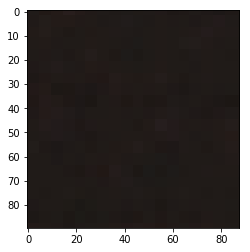

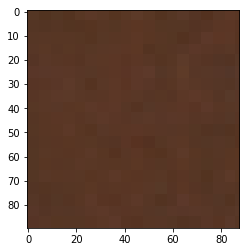

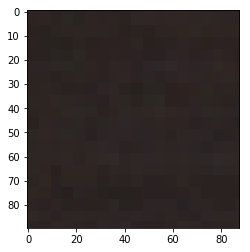

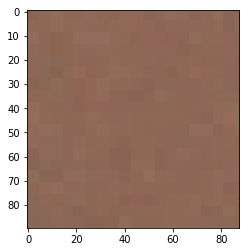

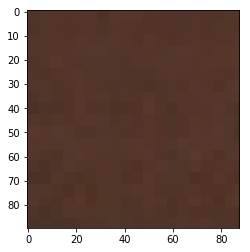

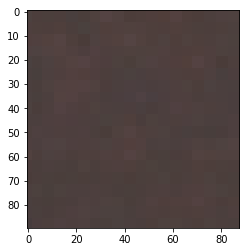

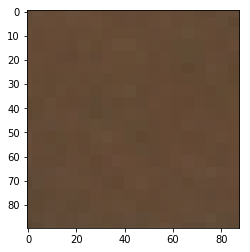

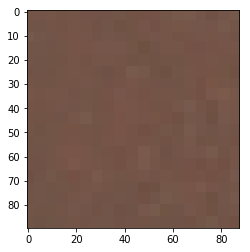

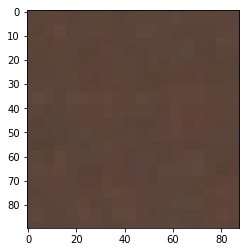

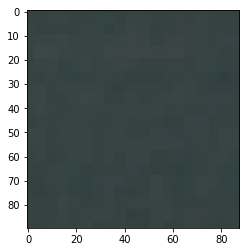

In [378]:
import matplotlib.pyplot as plt

for i in range(0, 10):   
    plt.figure(i)
    plt.imshow(imgs[i])
    
plt.show()


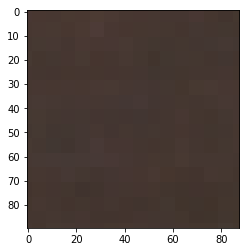

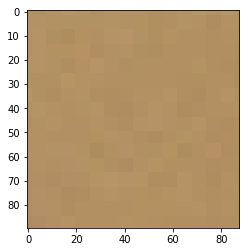

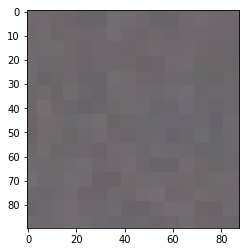

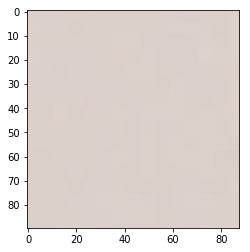

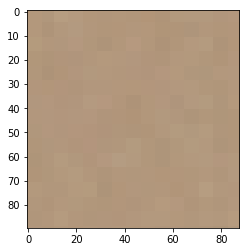

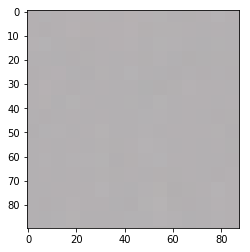

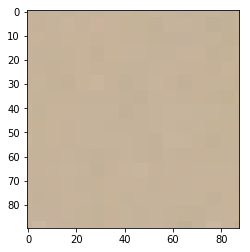

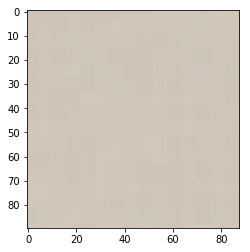

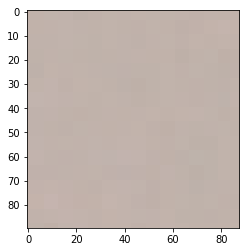

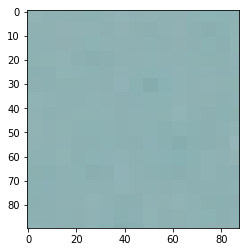

In [379]:
for i in range(0, 10):   
    plt.figure(i)
    plt.imshow(target[i])
    
plt.show()

In [380]:
type(imgs)

list

In [381]:
import torch
n_imgs = np.asarray(imgs)/255
n_target = np.asarray(target)/255
t_imgs = torch.tensor(np.asarray(n_imgs).reshape(-1, 3)) # this is to do regression on channels
t_target = torch.tensor(np.asarray(n_target).reshape(-1, 3)) # this is to do regression on channels

In [382]:
print(t_imgs.size(), t_target.size())
print(n_imgs.shape, n_target.shape)

torch.Size([380160, 3]) torch.Size([380160, 3])
(48, 90, 88, 3) (48, 90, 88, 3)


In [383]:
from torch.utils.data import Dataset, DataLoader
# Create the data class
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = t_imgs.view(-1, 3).float()
        self.y = t_target.float()
#         self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get items
    def __len__(self):
        return self.len

In [384]:
data_set = Data()

In [476]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.linear(x)
        return self.relu(out)

class SimpleNet(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(SimpleNet, self).__init__()
        
        self.i = nn.Linear(inputSize, 32)
        self.relu1 = nn.ReLU() 
        
        self.h2 = nn.Linear(32, 64)
        self.relu2 = nn.ReLU() 
        
        self.h3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU() 
        
        self.o = nn.Linear(32, outputSize)
        self.relu4 = nn.ReLU()

    def forward(self, x):
        
        output1 = self.i(x)
        output1 = self.relu1(output1)

        output2 = self.h2(output1)
        output2 = self.relu2(output2)

        output3 = self.h3(output2)
        output3 = self.relu3(output3)
        
        output4 = output1 + output3 # skip connection
        
        output = self.o(output4)
#         output = self.relu4(output)
        
        return output

In [477]:
trainloader = DataLoader(dataset=data_set, batch_size=32)
model = SimpleNet(3, 3)
y_predicted = model(t_imgs.float())

In [478]:
def save_models(epoch):
    torch.save(model.state_dict(), "reg_model{}.model".format(epoch))
    print("Chekcpoint saved")

In [479]:
### Hyperparameters
learningRate = 1
epochs = 10

In [480]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [481]:
# Train the model
def train_model(epochs):
    for epoch in range(epochs):  
        for x, y in trainloader:
#             print(x.shape, y.shape)
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
#             print(yhat[0], y[0])
            
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        if epoch % 10 ==0:
            save_models(epoch)

# train_model(10)

epoch 0, loss 8.98513535503298e-05
Chekcpoint saved
epoch 1, loss 9.088126535061747e-05
epoch 2, loss 9.041740850079805e-05
epoch 3, loss 9.204159141518176e-05
epoch 4, loss 9.145432704826817e-05
epoch 5, loss 9.499937732471153e-05
epoch 6, loss 9.412289364263415e-05
epoch 7, loss 9.508603397989646e-05
epoch 8, loss 9.560206672176719e-05
epoch 9, loss 9.559089812682942e-05


In [487]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(t_imgs.float()).data.numpy()
    org = t_imgs.numpy()
    res = t_target.numpy()
    print(predicted)


[[0.40897048 0.35915628 0.3600173 ]
 [0.408382   0.35961834 0.36012438]
 [0.408382   0.35961834 0.36012438]
 ...
 [0.43009827 0.402648   0.42024073]
 [0.43009827 0.402648   0.42024073]
 [0.43016306 0.40812594 0.42762026]]


In [483]:
type(t_target.numpy())

numpy.ndarray

In [489]:
predicted = predicted.reshape(48, 90, 88, 3)
org = org.reshape(48, 90, 88, 3)
res = res.reshape(48, 90, 88, 3)

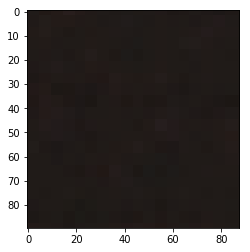

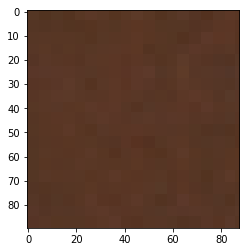

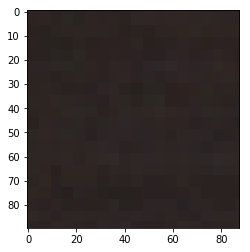

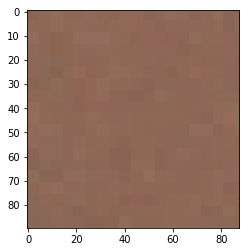

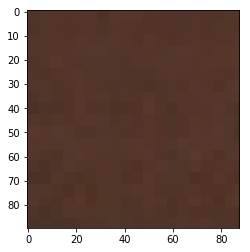

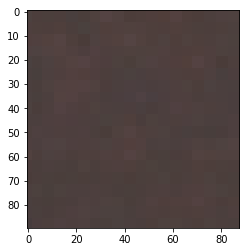

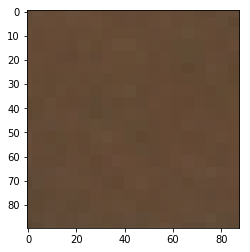

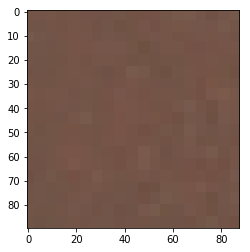

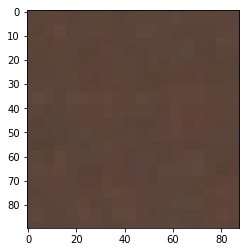

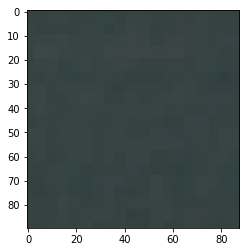

In [493]:
for i in range(0, 10):   
    plt.figure(i)
    plt.imshow(org[i])
    
plt.show()

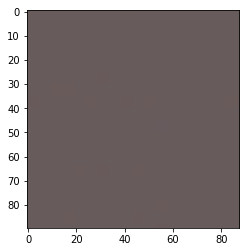

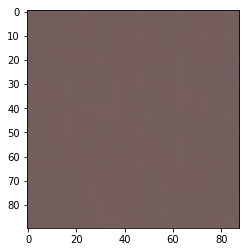

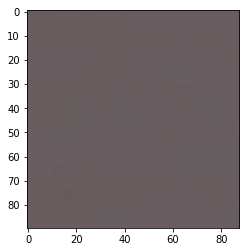

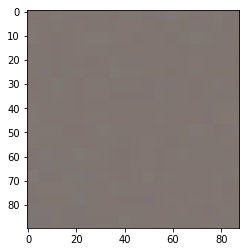

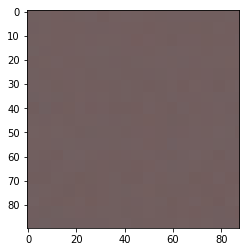

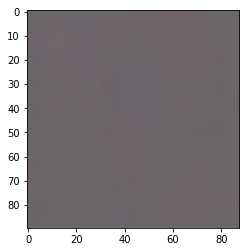

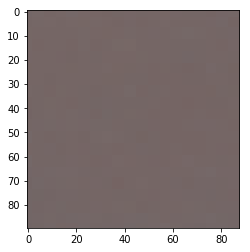

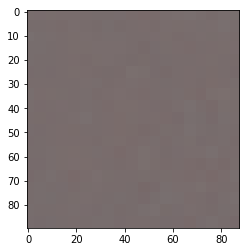

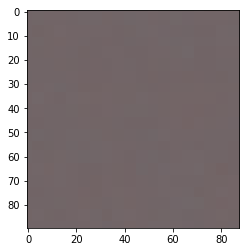

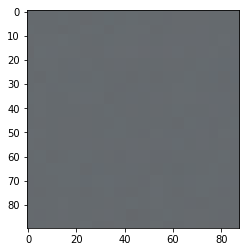

In [494]:
for i in range(0, 10):   
    plt.figure(i)
    plt.imshow(predicted[i])
    
plt.show()

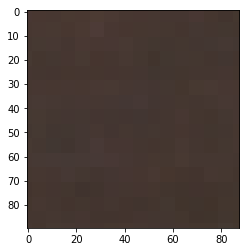

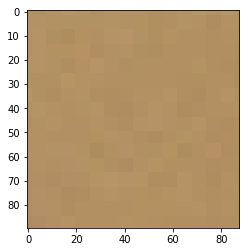

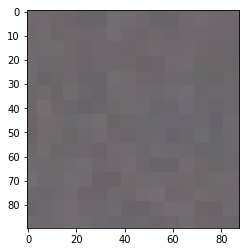

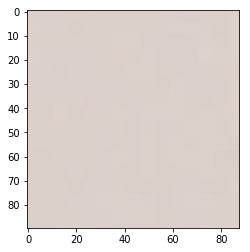

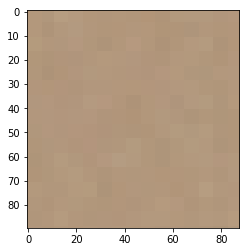

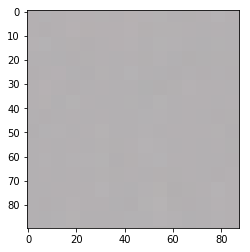

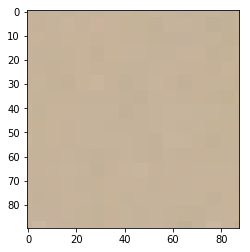

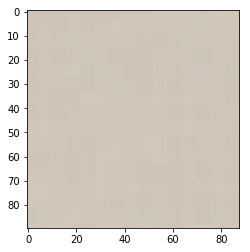

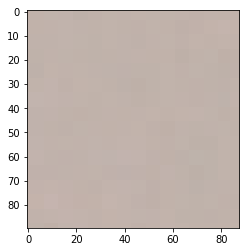

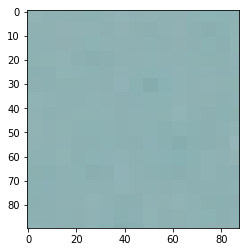

In [495]:
for i in range(0, 10):   
    plt.figure(i)
    plt.imshow(res[i])
    
plt.show()

(1200, 1920, 3)


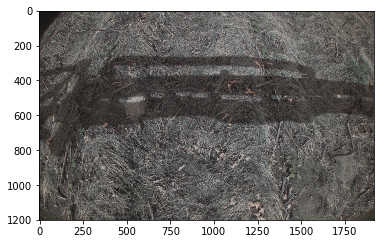

In [511]:
im = cv2.imread('../Research/Shadow/shadow.png')

plt.figure(0)
plt.imshow(im)
print(im.shape)

im = im/255
t_im = torch.tensor(np.asarray(im).reshape(-1, 3)) # this is to do regression on channels

In [503]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(t_im.float()).data.numpy()
predicted = predicted.reshape(1200, 1920, 3)

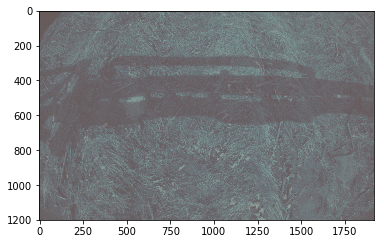

In [510]:
plt.figure(0)
# plt.imshow((predicted * 255).astype(np.uint8))
plt.imshow(predicted)
    
plt.show()